In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.image import imread

plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('..', 'datasets', 'gabriel-sollmann.jpg'))
B = np.mean(A, -1);  # Convert RGB to grayscale

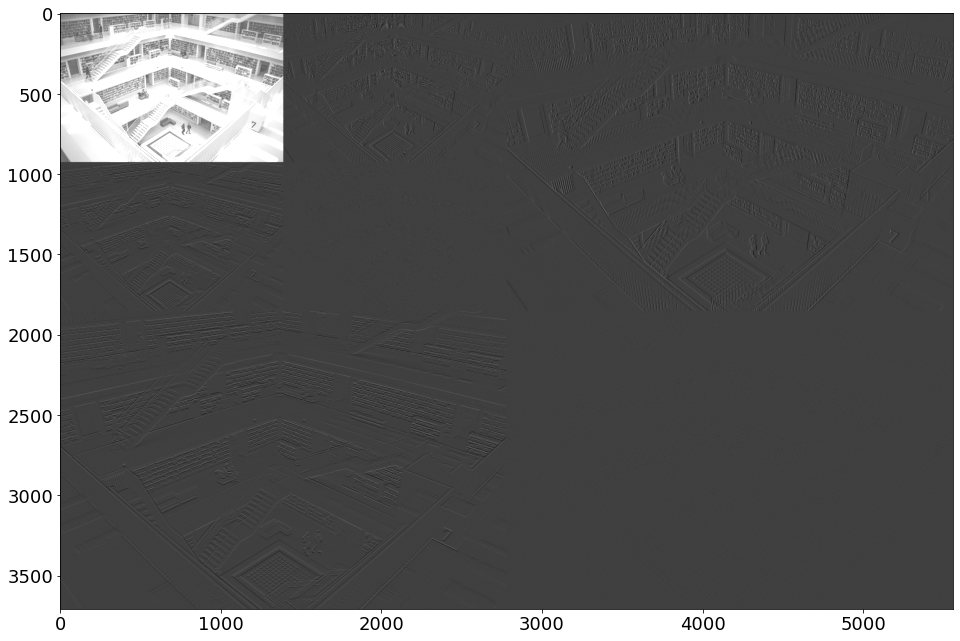

In [6]:
## Wavelet decomposition (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B, wavelet=w, level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d / np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr, cmap='gray', vmin=-0.25, vmax=0.75)
plt.show()